### Thallys Oliveira - 11819827

Questão 2 - Lista 4

In [1]:
import urllib.request
try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0339-SEL5886_2023/raw/main/imagens/pratica_04/cores.jpeg", "cores.jpeg")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

In [2]:

import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

from skimage.transform import hough_circle, hough_circle_peak

ImportError: cannot import name 'hough_circle_peak' from 'skimage.transform' (/usr/local/lib/python3.8/dist-packages/skimage/transform/__init__.py)

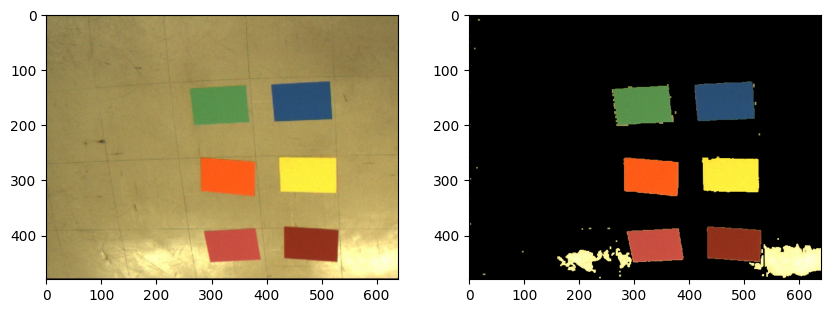

In [3]:
## -- Seu código começa AQUI -- ##
img_bgr = cv.imread("cores.jpeg")
img_hsv = cv.cvtColor(img_bgr, cv.COLOR_BGR2HSV)

#Capturar os canais H, S, V para aplicar posteriormente o K-means na matiz (H)
(H,S,V) = cv.split(img_hsv)

nCluster = 5   #K = 5 (número de classes para segmentar)
nIteracao = 20
epsilon = 0.01

# K-means aqui
convertedImg = H.astype(np.float32)   #Converter imagem para o tipo float32
imgVector = np.ravel(convertedImg)
criterio = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, nIteracao, epsilon)
ret,label,centers = cv.kmeans(imgVector, nCluster, None, criterio, 5, cv.KMEANS_PP_CENTERS)

## -- Seu código termina AQUI -- ##


# Cálcula a área de cada label
areas = np.empty_like(centers)
for i in range(centers.shape[0]):
  mask = np.where(label == i, 1, 0).reshape(img_hsv[:,:,0].shape)
  areas[i] = mask.sum()

# Ordem crescente
areas = np.sort(areas,axis=0)

# Cria uma mascara para cada label e aplica na imagem original
segment = np.zeros_like(img_bgr, np.uint8)
for i in range(centers.shape[0]):
  mask = np.where(label == i, 1, 0).reshape(img_hsv[:,:,0].shape)
  # Se for o fundo, atribua o valor 0
  if(mask.sum() == areas[-1]):
    mask[:] = 0
  mask = cv.morphologyEx(np.uint8(mask), cv.MORPH_OPEN, cv.getStructuringElement(cv.MORPH_RECT,(3,3)))
  mask = np.tile(np.expand_dims(mask,axis=-1),(1,1,3))
  segment = segment + np.uint8(mask * img_bgr)

# Mostra o resultado
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(cv.cvtColor(img_bgr,cv.COLOR_BGR2RGB));
plt.subplot(1,2,2)
plt.imshow(cv.cvtColor(segment,cv.COLOR_BGR2RGB));